# Alıştırma İçin Notebook

* Verilerin tamamı regresyon problemidir.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Her 20 epoch sonu öğrenilen eğriyi çizer.
class PlotCallback(tf.keras.callbacks.Callback):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            fig = plt.figure()
            y_pred = self.model.predict(self.x)

            plt.plot(self.x, self.y, 'o', label='data', markersize=3)
            plt.plot(self.x, y_pred, 'o', label='prediction', color='red', markersize=3)
            plt.legend()
            plt.title('Epoch: {}'.format(epoch))

            plt.show()

------------------------------------------------------------------------------------------ 
 easy


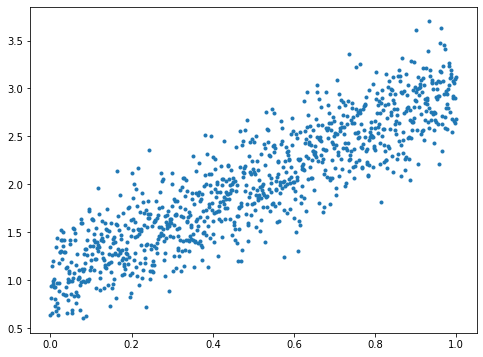

------------------------------------------------------------------------------------------ 
 medium


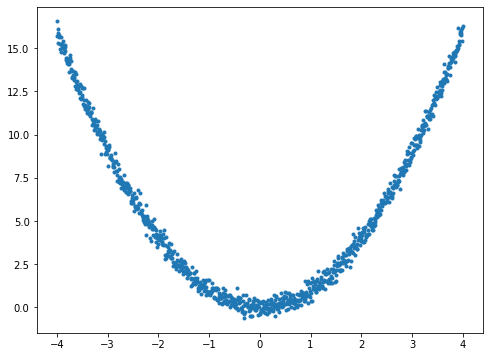

------------------------------------------------------------------------------------------ 
 hard


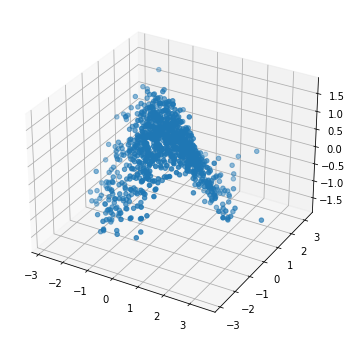

------------------------------------------------------------------------------------------ 
 challenging


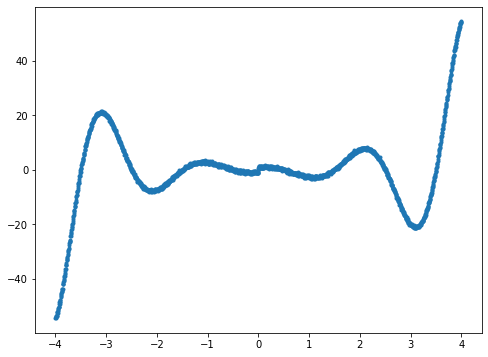

In [3]:
def dataset(option='easy', n=1000, noise=0.3, plot=True):
    if option == 'easy': # Baseline: 0.09 MSE Loss
        x = np.linspace(0, 1, n)
        y = 2 * x + 1 + np.random.randn(n) * noise

    elif option == 'medium': # Baseline: 0.086 MSE Loss
        x = np.linspace(-4, 4, n)
        y = x ** 2 + np.random.randn(n) * noise

    elif option == 'hard': # Baseline: 0.0962 MSE Loss
        x = np.random.randn(n, 2)
        y = np.cos(np.sum(x, axis=1)) + np.random.randn(n) * noise

    elif option == 'challenging': # Baseline 0.24 MSE Loss -- En iyi: 0.17 altı
        x = np.linspace(0, 4, n)
        y = np.exp(x) * np.cos(np.pi * x) + np.random.randn(n) * noise
        x = np.concatenate((x, -x), axis = -1)
        y = np.concatenate((y, -y), axis = -1)

    else:
        raise ValueError('Bilinmeyen Seçenek')

    if plot and option != 'hard':
        plt.figure(figsize = (8, 6))
        plt.plot(x, y, '.')
        plt.show()

    else:
        fig = plt.figure(figsize = (8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x[:, 0], x[:, 1], y)
        plt.show()

    return x, y

for i in ['easy', 'medium', 'hard', 'challenging']:
    print('---' * 30, '\n', i)
    x, y = dataset(option=i, n=1000, noise=0.3, plot=True)

In [ ]:
x, y = dataset(option='easy', n=1000, noise=0.3, plot=True)

In [ ]:
# Modeli oluşturup input_shape ayarlayıp, model.summary() ile parametre sayısını kontrol edebilirsiniz.

EPOCHS = ...

model = 

In [ ]:
model.fit(x.reshape(-1, 1), y, epochs = EPOCHS, 
          callbacks = [PlotCallback(x, y)]) # hard kısmında callback'i silebilirsiniz.

print('Loss:' + str(model.evaluate(x, y)))